In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel(r"E:\Australia_GDP_Cleaning\Commodities\METAL_PRICES.xlsx", sheet_name='metal_prices_AUD_cleaned', parse_dates=['Date'], index_col='Date')
df.columns = ['Aluminum','Gold','Lead','Nickel','Palladium','Platinum','Silver','Tin','Zinc','Copper','Uranium','Steel Rebar','Cobalt','Iron Ore','Lithium']



In [43]:
df['Aluminum'] = df['Aluminum'].fillna(method='ffill')
df['Gold'] = df['Gold'].fillna(method='ffill')
df['Lead'] = df['Lead'].fillna(method='ffill')
df['Nickel'] = df['Nickel'].fillna(method='ffill')
df['Palladium'] = df['Palladium'].fillna(method='ffill')
df['Platinum'] = df['Platinum'].fillna(method='ffill')
df['Silver'] = df['Silver'].fillna(method='ffill')
df['Tin'] = df['Tin'].fillna(method='ffill')
df['Zinc'] = df['Zinc'].fillna(method='ffill')
df['Copper'] = df['Copper'].fillna(method='ffill')

In [44]:
df

,Aluminum,Gold,Lead,Nickel,Palladium,Platinum,Silver,Tin,Zinc,Copper,Uranium,Steel Rebar,Cobalt,Iron Ore,Lithium
Date,,,,,,,,,,,,,,,
2000-01-03,1.122055,438.516492,0.329837,5.808634,683.994528,674.874601,8.116735,3.978112,0.846329,1.279780,NaN,NaN,NaN,NaN,NaN
2000-01-04,1.116219,430.742211,0.329566,5.746029,687.232743,685.705559,8.097892,3.996946,0.838119,1.279780,NaN,NaN,NaN,NaN,NaN
2000-01-05,1.123500,428.528027,0.326599,5.711378,677.502658,663.831080,8.028255,4.099803,0.830169,1.287407,NaN,NaN,NaN,NaN,NaN
2000-01-06,1.134792,428.932069,0.334149,5.717411,676.254590,650.244798,7.864137,4.129284,0.838739,1.292840,NaN,NaN,NaN,NaN,NaN
2000-01-07,1.141570,430.665852,0.337202,5.653940,670.433720,636.835675,7.842089,4.204795,0.835522,1.291234,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-21,1.909363,4610.070810,1.433832,11.048938,1538.945712,1535.798584,51.817467,24.037766,2.090165,7.136900,101.809599,715.656963,15.381432,168.575925,16.514555
2025-02-24,1.898078,4632.325142,1.420762,11.015911,1502.835539,1526.465028,51.212980,23.753938,2.036704,7.111374,101.921865,716.729679,15.398393,168.856333,16.479206
2025-02-25,1.887908,4638.262652,1.433864,10.967208,1477.218982,1527.668296,50.677913,23.436860,2.008356,7.077093,103.657575,700.394135,15.410531,168.957906,16.478007


In [45]:
print("Missing values in Iron Ore:", df['Iron Ore'].isnull().sum())

corr = df.corr()
print("\nCorrelation Matrix:\n", corr['Iron Ore'].sort_values(ascending=False))

Missing values in Iron Ore: 3002

Correlation Matrix:
 Iron Ore       1.000000
Copper         0.700677
Silver         0.674239
Steel Rebar    0.641705
Nickel         0.639426
Tin            0.609359
Palladium      0.580779
Gold           0.529261
Aluminum       0.498772
Uranium        0.380321
Platinum       0.346731
Zinc           0.333370
Lead           0.299688
Lithium        0.126645
Cobalt         0.095522
Name: Iron Ore, dtype: float64


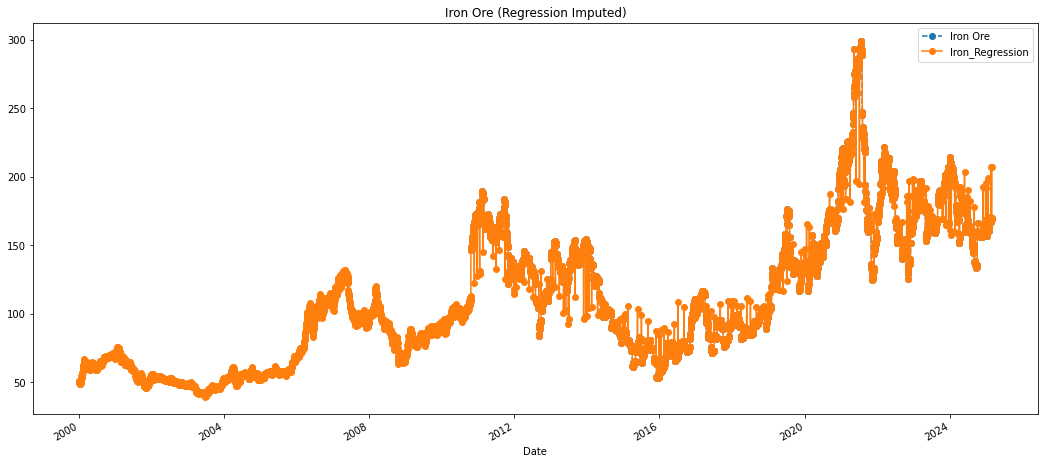

In [47]:
known = df.dropna(subset=['Iron Ore'])
unknown = df[df['Iron Ore'].isnull()]

features = ['Nickel','Palladium','Silver']
X_train = known[features]
y_train = known['Iron Ore']

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing Coal values
X_pred = unknown[features]
predicted_coal = model.predict(X_pred)

# Fill missing values
df['Iron_Regression'] = df['Iron Ore'].copy()
df.loc[df['Iron Ore'].isnull(), 'Iron_Regression'] = predicted_coal


plt.figure(figsize=(18, 8))
df['Iron Ore'].plot(title='Iron Ore (Original)', marker='o', linestyle='--')
df['Iron_Regression'].plot(title='Iron Ore (Regression Imputed)', marker='o')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

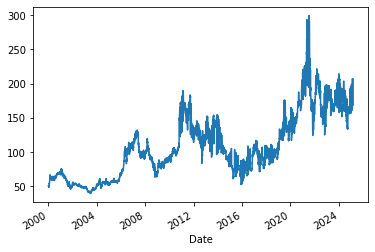

In [49]:
df['Iron_Regression'].plot()

<Axes: xlabel='Date'>

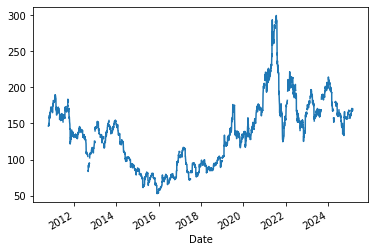

In [50]:
df['Iron Ore'].plot()

# IDENTIFY SPIKES

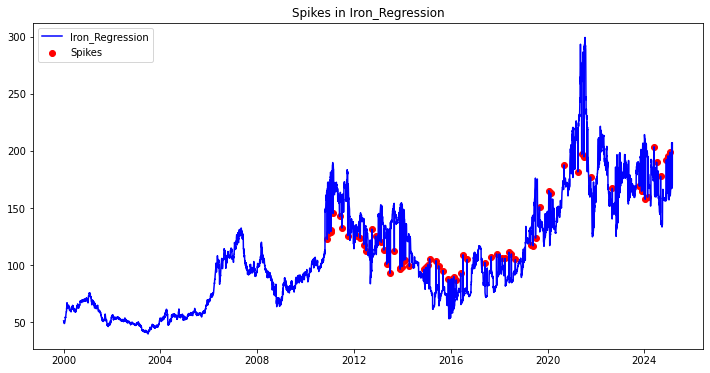

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


window = 30
rolling_mean = df['Iron_Regression'].rolling(window=window, center=True).mean()
rolling_std = df['Iron_Regression'].rolling(window=window, center=True).std()


threshold = 3 
df['Is_Spike'] = np.abs(df['Iron_Regression'] - rolling_mean) > (threshold * rolling_std)


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Iron_Regression'], label='Iron_Regression', color='blue')
plt.scatter(df.index[df['Is_Spike']], df['Iron_Regression'][df['Is_Spike']], color='red', label='Spikes')
plt.title('Spikes in Iron_Regression')
plt.legend()
plt.show()

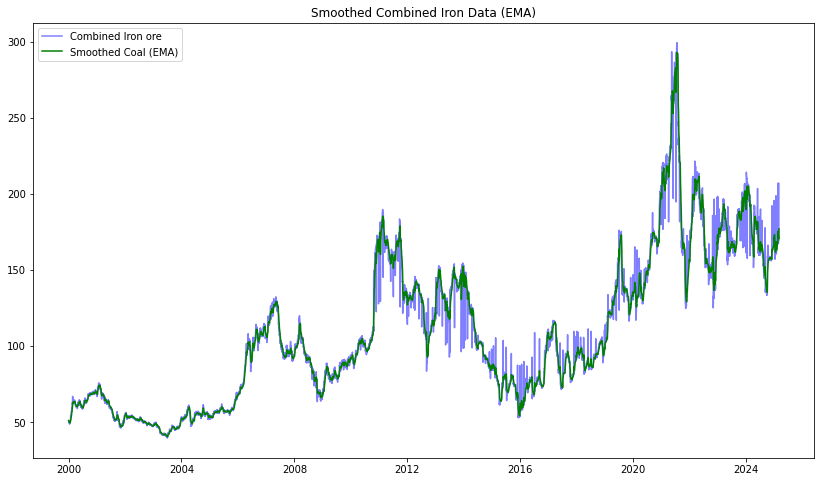

In [52]:
df['Iron_smooth'] = df['Iron_Regression'].ewm(span=10, adjust=False).mean()

plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Iron_Regression'], label='Combined Iron ore', color='blue', alpha=0.5)
plt.plot(df.index, df['Iron_smooth'], label='Smoothed Coal (EMA)', color='green')
plt.title('Smoothed Combined Iron Data (EMA)')
plt.legend()
plt.show()

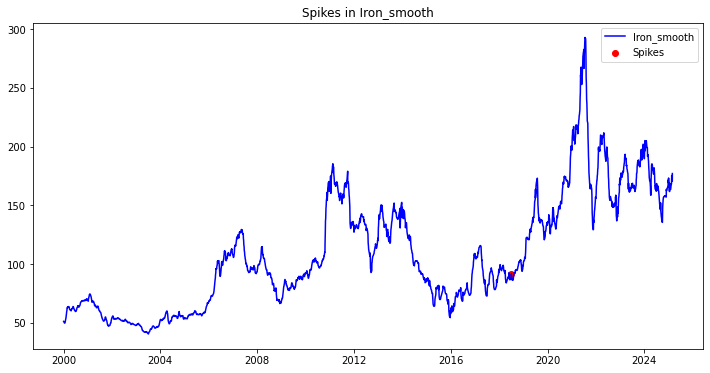

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

window = 30  
rolling_mean = df['Iron_smooth'].rolling(window=window, center=True).mean()
rolling_std = df['Iron_smooth'].rolling(window=window, center=True).std()

threshold = 3 
df['Is_Spike'] = np.abs(df['Iron_smooth'] - rolling_mean) > (threshold * rolling_std)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Iron_smooth'], label='Iron_smooth', color='blue')
plt.scatter(df.index[df['Is_Spike']], df['Iron_smooth'][df['Is_Spike']], color='red', label='Spikes')
plt.title('Spikes in Iron_smooth')
plt.legend()
plt.show()

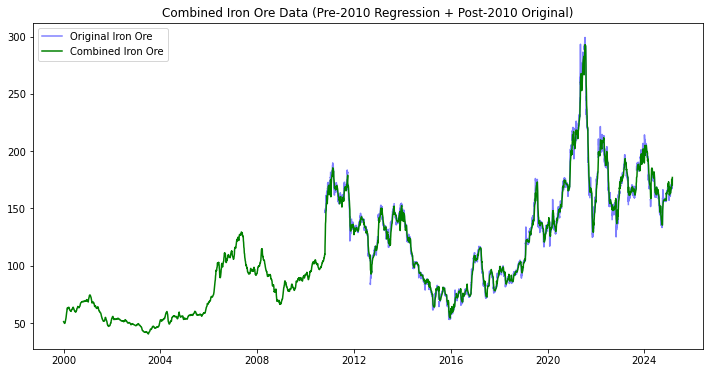

In [55]:
df['Iron_Ore_Combined'] = df['Iron Ore'].copy()
df.loc[df.index < '2010-10-30', 'Iron_Ore_Combined'] = df['Iron_smooth']

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Iron Ore'], label='Original Iron Ore', color='blue', alpha=0.5)
plt.plot(df.index, df['Iron_smooth'], label='Combined Iron Ore', color='green')
plt.title('Combined Iron Ore Data (Pre-2010 Regression + Post-2010 Original)')
plt.legend()
plt.show()

In [56]:
df

,Aluminum,Gold,Lead,Nickel,Palladium,Platinum,Silver,Tin,Zinc,Copper,Uranium,Steel Rebar,Cobalt,Iron Ore,Lithium,Iron_Regression,Is_Spike,Iron_smooth,Iron_Ore_Combined
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,1.122055,438.516492,0.329837,5.808634,683.994528,674.874601,8.116735,3.978112,0.846329,1.279780,NaN,NaN,NaN,NaN,NaN,51.122564,False,51.122564,51.122564
2000-01-04,1.116219,430.742211,0.329566,5.746029,687.232743,685.705559,8.097892,3.996946,0.838119,1.279780,NaN,NaN,NaN,NaN,NaN,50.971329,False,51.095067,51.095067
2000-01-05,1.123500,428.528027,0.326599,5.711378,677.502658,663.831080,8.028255,4.099803,0.830169,1.287407,NaN,NaN,NaN,NaN,NaN,50.498740,False,50.986644,50.986644
2000-01-06,1.134792,428.932069,0.334149,5.717411,676.254590,650.244798,7.864137,4.129284,0.838739,1.292840,NaN,NaN,NaN,NaN,NaN,50.027807,False,50.812310,50.812310
2000-01-07,1.141570,430.665852,0.337202,5.653940,670.433720,636.835675,7.842089,4.204795,0.835522,1.291234,NaN,NaN,NaN,NaN,NaN,49.674566,False,50.605447,50.605447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-21,1.909363,4610.070810,1.433832,11.048938,1538.945712,1535.798584,51.817467,24.037766,2.090165,7.136900,101.809599,715.656963,15.381432,168.575925,16.514555,168.575925,False,171.365229,168.575925
2025-02-24,1.898078,4632.325142,1.420762,11.015911,1502.835539,1526.465028,51.212980,23.753938,2.036704,7.111374,101.921865,716.729679,15.398393,168.856333,16.479206,168.856333,False,170.909066,168.856333
2025-02-25,1.887908,4638.262652,1.433864,10.967208,1477.218982,1527.668296,50.677913,23.436860,2.008356,7.077093,103.657575,700.394135,15.410531,168.957906,16.478007,168.957906,False,170.554309,168.957906


In [57]:
df.to_excel(r"E:\Australia_GDP_Cleaning\Commodities\METAL_PRICES_Interpolated_iron.xlsx", index=False)